## Importing Libraries

In [59]:
## loading and preprocessing data
import numpy as np
import pandas as pd
## data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Loading And Creating a Copy of data

In [2]:
toyota_data = pd.read_csv("Datasets/Toyota.csv")

In [3]:
## Creating a Copy
toyota_df = toyota_data.copy()

## Overviewing And Understanding The Toyota Dataframe

In [4]:
## lets see the first five rows
toyota_df.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [5]:
## lets see the last five rows
toyota_df.tail()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1431,1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,1432,10845,72.0,??,Petrol,86,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,1434,7250,70.0,??,NaN,86,1.0,0,1300,3,1015
1435,1435,6950,76.0,1,Petrol,110,0.0,0,1600,5,1114


In [6]:
## lets check the size of the data
toyota_df.size

15796

In [7]:
## lets check total number of rows and columns
print(f"Total Number of Rows: {toyota_df.shape[0]} => Total Number of Columns: {toyota_data.shape[1]}")

Total Number of Rows: 1436 => Total Number of Columns: 11


In [8]:
## lets display index
toyota_df.index

RangeIndex(start=0, stop=1436, step=1)

In [9]:
## lets display the column names
toyota_df.columns

Index(['Unnamed: 0', 'Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor',
       'Automatic', 'CC', 'Doors', 'Weight'],
      dtype='object')

In [10]:
## lets check the columns types 
toyota_df.dtypes

Unnamed: 0      int64
Price           int64
Age           float64
KM             object
FuelType       object
HP             object
MetColor      float64
Automatic       int64
CC              int64
Doors          object
Weight          int64
dtype: object

In [11]:
## lets get a concise summary of our toyota dataframes
toyota_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 123.5+ KB


check for unique instances in the following columns
- HP
- KM
- MetColor
- Automatic
- Doors


In [12]:
print(np.unique(toyota_df['HP']))

['107' '110' '116' '192' '69' '71' '72' '73' '86' '90' '97' '98' '????']


In [13]:
print(np.unique(toyota_df['KM']))

['1' '10000' '100123' ... '99865' '99971' '??']


In [14]:
print(np.unique(toyota_df['MetColor']))

[ 0.  1. nan]


In [15]:
print(np.unique(toyota_df['Automatic']))

[0 1]


In [16]:
print(np.unique(toyota_df['Doors']))

['2' '3' '4' '5' 'five' 'four' 'three']


## Data Preprocessing
- replace '??' with NaN and change column type to float
- replace '????' in HP with NaN and change column type to float
- In column 'Doors',replace 'five' with 5, 'four' with 4, 'three' with 3, and change column type

In [17]:
toyota_df['KM'] = toyota_df['KM'].replace('??' , np.nan)
toyota_df['KM'] = toyota_df['KM'].astype(float)                                        

In [18]:
toyota_df['HP'] = toyota_df['HP'].replace('????' , np.nan)
toyota_df['HP'] = toyota_df['HP'].astype(float)                                        

In [19]:
toyota_df['Doors'] = toyota_df['Doors'].replace('five' , 5)
toyota_df['Doors'] = toyota_df['Doors'].replace('four' , 4)
toyota_df['Doors'] = toyota_df['Doors'].replace('three' , 3)
toyota_df['Doors'] = toyota_df['Doors'].astype(int)                                        



In [20]:
toyota_df['Doors'] = toyota_df['Doors'].astype('category')

In [21]:
## reading the mean on the age column
mean_age = toyota_df['Age'].mean()

In [22]:
age = round(mean_age, 0)
age

56.0

In [23]:
toyota_df['Age'].median()

60.0

In [24]:
toyota_df['Age'] = toyota_df['Age'].fillna(age)

In [25]:
toyota_df['Age'].isnull().sum()

0

In [26]:
## reading the median value on KM column
km_median = toyota_df['KM'].median()

In [27]:
toyota_df['KM'] = toyota_df['KM'].fillna(km_median)

In [28]:
toyota_df['KM'].isnull().sum()

0

In [29]:
## reading the median value on the MetColor column
toyota_df['MetColor'].median()

1.0

In [30]:
toyota_df['MetColor'].mean()

0.6749611197511665

In [31]:
toyota_df['FuelType'].value_counts()

FuelType
Petrol    1177
Diesel     144
CNG         15
Name: count, dtype: int64

In [32]:
toyota_df['FuelType'].value_counts().index[0]

'Petrol'

In [33]:
highest_count_fuelType = toyota_df['FuelType'].value_counts().index[0]

In [34]:
toyota_df['FuelType'] = toyota_df['FuelType'].fillna(highest_count_fuelType)

In [35]:
toyota_df['FuelType'].isnull().sum()

0

In [36]:
toyota_df.dtypes

Unnamed: 0       int64
Price            int64
Age            float64
KM             float64
FuelType        object
HP             float64
MetColor       float64
Automatic        int64
CC               int64
Doors         category
Weight           int64
dtype: object

In [37]:
toyota_df['Profit'] = toyota_df['Price'] - toyota_df['KM']

In [38]:
toyota_df.dtypes

Unnamed: 0       int64
Price            int64
Age            float64
KM             float64
FuelType        object
HP             float64
MetColor       float64
Automatic        int64
CC               int64
Doors         category
Weight           int64
Profit         float64
dtype: object

In [39]:
numerical_cols = ['Profit', 'Age', 'KM', 'HP', 'CC', 'Weight', 'Profit']
categorical_cols = ['Doors', 'FuelType', 'MetColor']

In [40]:
num_df = toyota_df[numerical_cols]
num_df

,Profit,Age,KM,HP,CC,Weight,Profit
0,-33486.0,23.0,46986.0,90.0,2000,1165,-33486.0
1,-59187.0,23.0,72937.0,90.0,2000,1165,-59187.0
2,-27761.0,24.0,41711.0,90.0,2000,1165,-27761.0
3,-33050.0,26.0,48000.0,90.0,2000,1165,-33050.0
4,-24750.0,30.0,38500.0,90.0,2000,1170,-24750.0
...,...,...,...,...,...,...,...
1431,-13044.0,56.0,20544.0,86.0,1300,1025,-13044.0
1432,-52789.0,72.0,63634.0,86.0,1300,1015,-52789.0
1433,-8516.0,56.0,17016.0,86.0,1300,1015,-8516.0
1434,-56384.0,70.0,63634.0,86.0,1300,1015,-56384.0


In [41]:
 cat_df = toyota_df[categorical_cols]
cat_df

,Doors,FuelType,MetColor
0,3,Diesel,1.0
1,3,Diesel,1.0
2,3,Diesel,NaN
3,3,Diesel,0.0
4,3,Diesel,0.0
...,...,...,...
1431,3,Petrol,1.0
1432,3,Petrol,0.0
1433,3,Petrol,0.0
1434,3,Petrol,1.0


## Descriptive Analysis
- Toyota Price, Highest Price, and Lowest Price

In [42]:
toyota_df['Price'].sum()

15409464

In [43]:
toyota_df['Price'].min()

4350

In [44]:
toyota_df['Price'].max()

32500

In [45]:
toyota_df.describe().round()

,Unnamed: 0,Price,Age,KM,HP,MetColor,Automatic,CC,Weight,Profit
count,1436.0,1436.0,1436.0,1436.0,1430.0,1286.0,1436.0,1436.0,1436.0,1436.0
mean,718.0,10731.0,56.0,68595.0,101.0,1.0,0.0,1567.0,1072.0,-57864.0
std,415.0,3627.0,18.0,37141.0,15.0,0.0,0.0,187.0,53.0,39307.0
min,0.0,4350.0,1.0,1.0,69.0,0.0,0.0,1300.0,1000.0,-236050.0
25%,359.0,8450.0,44.0,43506.0,90.0,0.0,0.0,1400.0,1040.0,-77603.0
50%,718.0,9900.0,59.0,63634.0,110.0,1.0,0.0,1600.0,1070.0,-53560.0
75%,1076.0,11950.0,68.0,86916.0,110.0,1.0,0.0,1600.0,1085.0,-32013.0
max,1435.0,32500.0,80.0,243000.0,192.0,1.0,1.0,2000.0,1615.0,32499.0


In [46]:
  corr_toyota_df = num_df.corr()
  corr_toyota_df

,Profit,Age,KM,HP,CC,Weight,Profit
Profit,1.000000,-0.546173,-0.997102,0.343247,-0.264742,0.078645,1.000000
Age,-0.546173,1.000000,0.495496,-0.153603,-0.116375,-0.442166,-0.546173
KM,-0.997102,0.495496,1.000000,-0.333035,0.296305,-0.026476,-0.997102
HP,0.343247,-0.153603,-0.333035,1.000000,0.053758,0.086737,0.343247
CC,-0.264742,-0.116375,0.296305,0.053758,1.000000,0.651450,-0.264742
Weight,0.078645,-0.442166,-0.026476,0.086737,0.651450,1.000000,0.078645
Profit,1.000000,-0.546173,-0.997102,0.343247,-0.264742,0.078645,1.000000


## Expolratory Data Analysis
- scatter plot...
- histogram plot

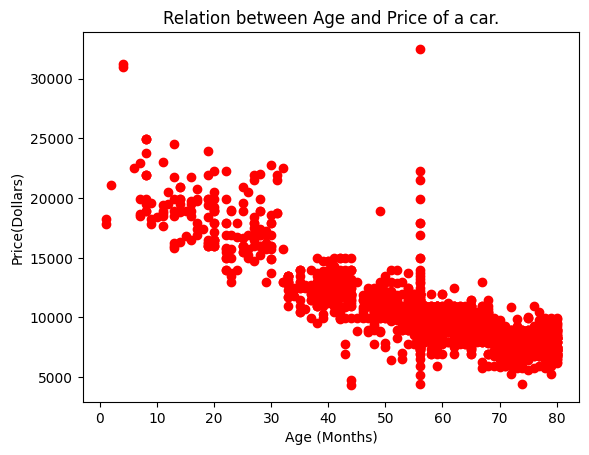

In [53]:
plt.scatter(toyota_df['Age'], toyota_df['Price'], c='red')

plt.title('Relation between Age and Price of a car.')


plt.ylabel('Price(Dollars)')

plt.xlabel('Age (Months)')
           
plt.savefig('age_price_rel.png') 
           
plt.show() 
           
            
            

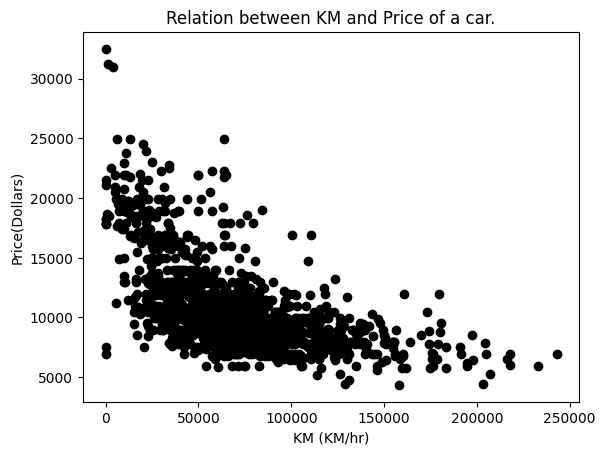

In [48]:
plt.scatter(toyota_df['KM'], toyota_df['Price'], c='black')

plt.title('Relation between KM and Price of a car.')


plt.ylabel('Price(Dollars)')

plt.xlabel('KM (KM/hr)')
           
plt.savefig('KM_price_rel.png') 
           
plt.show() 
           

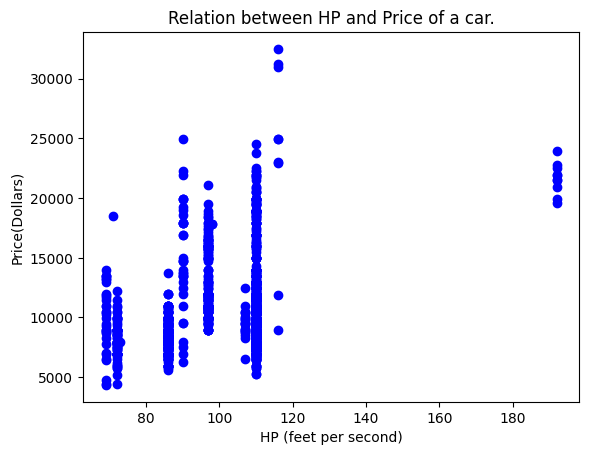

In [49]:
plt.scatter(toyota_df['HP'], toyota_df['Price'], c='blue')

plt.title('Relation between HP and Price of a car.')


plt.ylabel('Price(Dollars)')

plt.xlabel('HP (feet per second)')
           
plt.savefig('HP_price_rel.png') 
           
plt.show() 
           

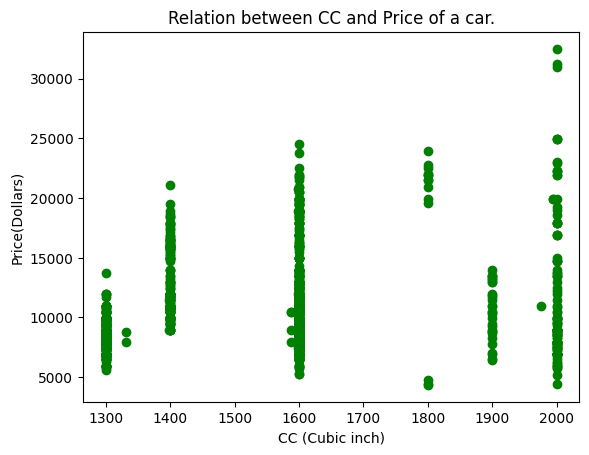

In [50]:
plt.scatter(toyota_df['CC'], toyota_df['Price'], c='green')

plt.title('Relation between CC and Price of a car.')


plt.ylabel('Price(Dollars)')

plt.xlabel('CC (Cubic inch)')
           
plt.savefig('CC_price_rel.png') 
           
plt.show() 
           

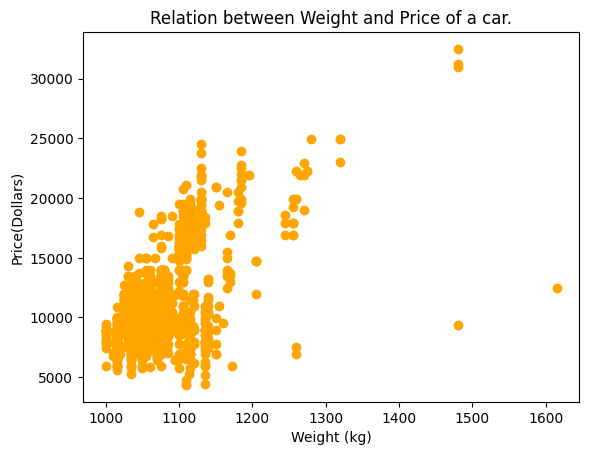

In [51]:
plt.scatter(toyota_df['Weight'], toyota_df['Price'], c='orange')

plt.title('Relation between Weight and Price of a car.')


plt.ylabel('Price(Dollars)')

plt.xlabel('Weight (kg)')
           
plt.savefig('Weight_price_rel.png') 
           
plt.show() 
           

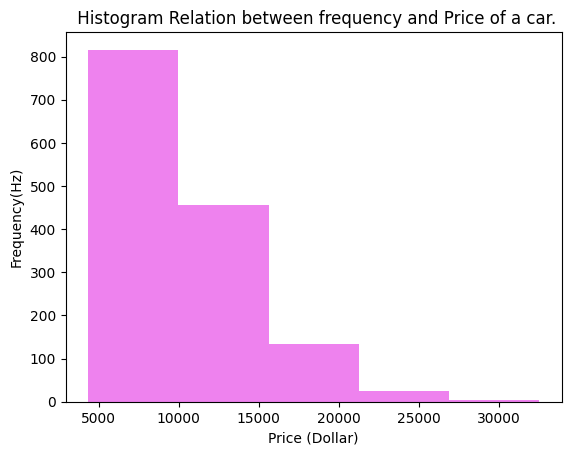

In [54]:
plt.hist(toyota_df['Price'], bins=5, color='violet')

plt.title(' Histogram Relation between frequency and Price of a car.')


plt.ylabel('Frequency(Hz)')

plt.xlabel('Price (Dollar)')
           
plt.savefig('frequency_price_rel.png') 
           
plt.show() 
           

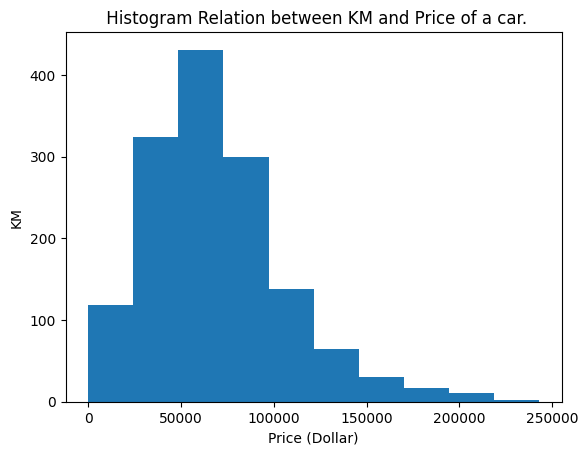

In [55]:
plt.hist(toyota_df['KM'])

plt.title(' Histogram Relation between KM and Price of a car.')


plt.ylabel('KM')

plt.xlabel('Price (Dollar)')
           
plt.savefig('KM_price_rel.png') 
           
plt.show() 

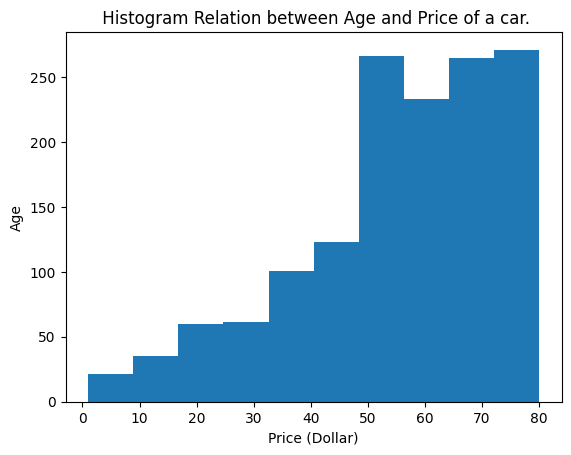

In [56]:
plt.hist(toyota_df['Age'])

plt.title(' Histogram Relation between Age and Price of a car.')


plt.ylabel('Age')

plt.xlabel('Price (Dollar)')
           
plt.savefig('Age_price_rel.png') 
           
plt.show() 

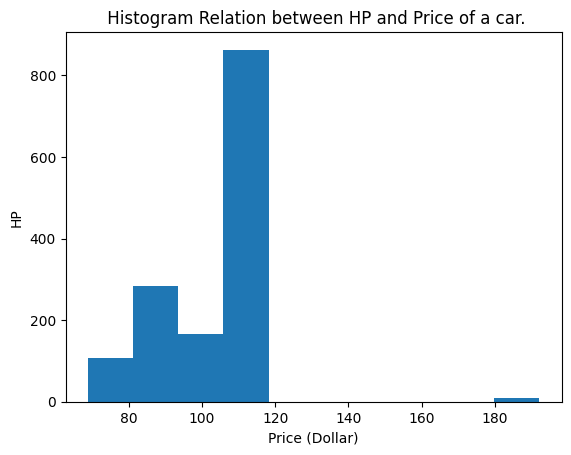

In [57]:
plt.hist(toyota_df['HP'])

plt.title(' Histogram Relation between HP and Price of a car.')


plt.ylabel('HP')

plt.xlabel('Price (Dollar)')
           
plt.savefig('HP_price_rel.png') 
           
plt.show() 

<Axes: xlabel='FuelType', ylabel='Price'>

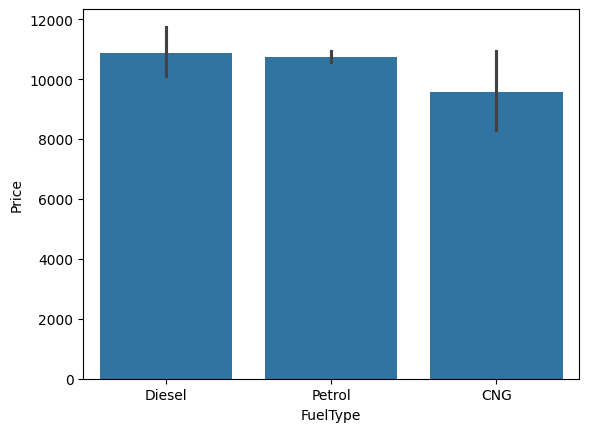

In [60]:
sns.barplot(data= toyota_df, y='Price' , x='FuelType')

<Axes: xlabel='FuelType', ylabel='count'>

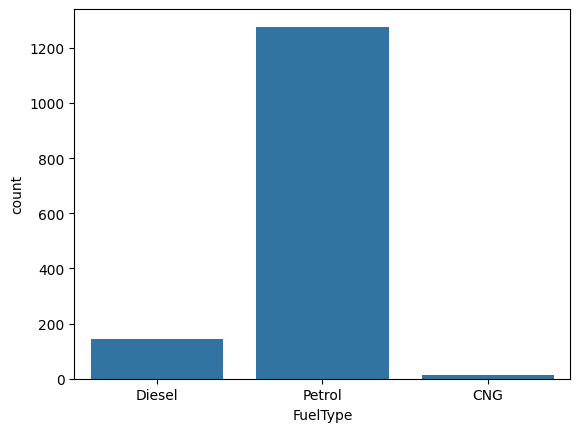

In [61]:
sns.countplot(data= toyota_df,  x='FuelType')

<Axes: xlabel='FuelType', ylabel='Price'>

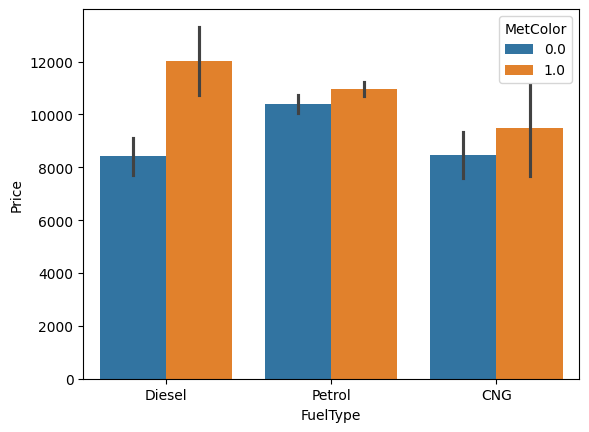

In [62]:
sns.barplot(data= toyota_df, y='Price' , x='FuelType' , hue='MetColor')

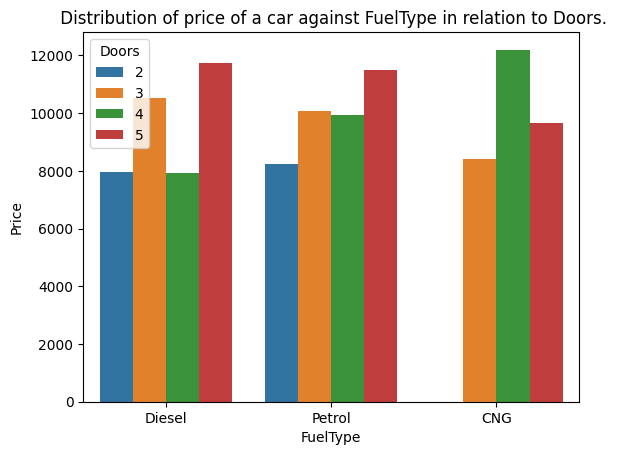

In [65]:
sns.barplot(data= toyota_df,y='Price' , x='FuelType' , hue='Doors', errorbar=None)

plt.title(' Distribution of price of a car against FuelType in relation to Doors.')


plt.ylabel('Price')

plt.xlabel('FuelType')
 
plt.show()

use a Seaborn lib to plot the Correlation between Price and Age of a car in relation to the Automatic

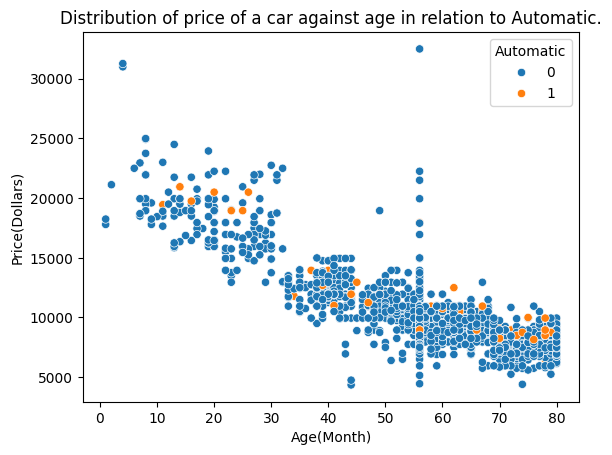

In [66]:
sns.scatterplot(data= toyota_df, y='Price' , x='Age' , hue='Automatic')

plt.title('Distribution of price of a car against age in relation to Automatic.')


plt.ylabel('Price(Dollars)')

plt.xlabel('Age(Month)')
 
plt.show()

Using a pie to represent the different categories of 'Doors' in the car dataset

In [67]:
doors_counts = toyota_df['Doors'].value_counts()

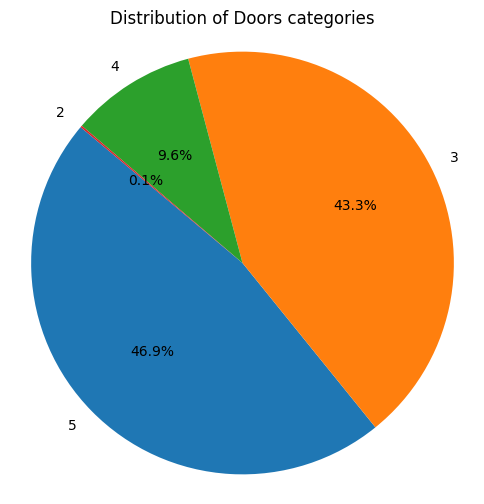

In [69]:
plt.figure(figsize=(6,6))

plt.pie(doors_counts,labels=doors_counts.index, autopct='%.1f%%', startangle=140)


plt.title('Distribution of Doors categories')

plt.axis('equal')
 
plt.show()